In [ ]:
try:
    # Comment out if not using colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Specific for luca's computer
    %cd "/content/drive/Othercomputers/Min MacBook Pro/INFO381-GitHub"
    using_colab = True
except:
    print("Not using Google Colab")
    using_colab = False

In [14]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.nn as nn
from sklearn.metrics import accuracy_score

/Users/ot/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ot/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [15]:
path_test = "cifar_train_test/test"

In [16]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [17]:
test_dataset = ImageFolder(root = path_test, transform = transform)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
model = models.resnet18(pretrained = False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load("resnet18_cnn.pth"))
model.eval()

/Users/ot/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ot/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
correct = 0
total = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
model.eval()  # Set to evaluation mode
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)  # Get the predicted class
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.94


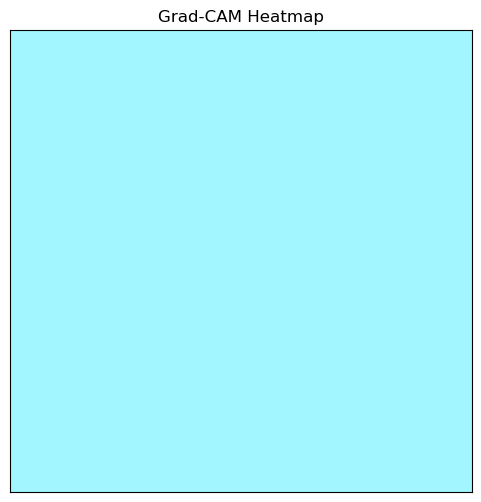

(<Figure size 600x600 with 1 Axes>,
 <AxesSubplot:title={'center':'Grad-CAM Heatmap'}>)

In [23]:
from captum.attr import LayerGradCam, visualization

# Move inputs to device
inputs, labels = inputs.to(device), labels.to(device)

# Define Grad-CAM explainer
grad_cam = LayerGradCam(model, model.layer4[-1])  # Try last conv layer

# Get model prediction
outputs = model(inputs[0].unsqueeze(0))
_, predicted_label = torch.max(outputs, 1)

# Compute attributions
attributions = grad_cam.attribute(inputs[0].unsqueeze(0), target=predicted_label)

# Convert to numpy for visualization
attributions_np = attributions.cpu().detach().numpy()
image_np = inputs[0].permute(1, 2, 0).cpu().numpy()

# Visualize
visualization.visualize_image_attr(attributions_np, 
                                   image_np, 
                                   method="heat_map", 
                                   sign="absolute_value", 
                                   title="Grad-CAM Heatmap")

In [24]:
import torch
import numpy as np
from scipy.ndimage import zoom
from captum.attr import LayerGradCam

def generate_cam(input_model, image, layer_name=None, H=224, W=224):
    """
    Generate a Grad-CAM heatmap for a given PyTorch model and image.
    
    Parameters:
        input_model (torch.nn.Module): The trained PyTorch model (e.g., ResNet18).
        image (torch.Tensor): Input image tensor of shape (C, H, W).
        layer_name (torch.nn.Module, optional): Layer to extract CAM from (default: last conv layer).
        H (int): Target image height.
        W (int): Target image width.
    
    Returns:
        np.ndarray: Normalized CAM heatmap.
    """
    # Ensure image is on the correct device
    device = next(input_model.parameters()).device
    image = image.unsqueeze(0).to(device)  # Add batch dimension

    # Forward pass to get the predicted class
    with torch.no_grad():
        outputs = input_model(image)
        predicted_class = torch.argmax(outputs, dim=1).item()  # Get the class index

    # Set default layer if not provided
    if layer_name is None:
        layer_name = input_model.layer4[-1]  # Last conv layer in ResNet

    # Initialize Grad-CAM
    grad_cam = LayerGradCam(input_model, layer_name)

    # Compute attributions
    attributions = grad_cam.attribute(image, target=predicted_class)

    # Convert attributions to numpy
    cam = attributions.squeeze().cpu().detach().numpy()

    # Normalize and resize CAM to match input image size
    cam = zoom(cam, (H / cam.shape[0], W / cam.shape[1]))
    cam = cam / np.max(cam)  # Normalize

    return cam


In [25]:
# Load an image from your dataset
sample_image, _ = train_dataset[0]  # Example image (C, H, W)

# Generate CAM heatmap
heatmap = generate_cam(model, sample_image)

# Visualize heatmap
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM Heatmap")
plt.axis("off")
plt.show()

NameError: name 'train_dataset' is not defined